# 二阶锥交流潮流优化模型 (SOCP-AC-OPF-Model)

## 1. 优化模型

$$
\begin{align}
\min_{P_{t,i,j}, Q_{t,i,j}, l_{t,i,j}, v_{t,i}, p_{t,i}, q_{t,i}, P_{g,t,g}, Q_{g,t,g}, P_{DR,t,dr}} \quad & \sum_{t=0}^{T-1} \sum_{(i,j) \in E} l_{t,i,j} \\
\text{s.t.} \quad \\
& v_{t,0} = 1.0, \quad \forall t \in \{0,1,\ldots,T-1\} \tag{1} \\
\\
& p_{t,j} = \sum_{g \in G_j} P_{g,t,g} + \sum_{dr \in DR_j} P_{DR,t,dr} + P_{d,t,j}, \quad \forall t, j \in N \tag{2a} \\
\\
& q_{t,j} = \sum_{g \in G_j} Q_{g,t,g} + Q_{d,t,j}, \quad \forall t, j \in N \tag{2b} \\
\\
& p_{t,j} = \sum_{(j,k) \in E} P_{t,j,k} - \sum_{(i,j) \in E} \left( P_{t,i,j} - r_{ij} \cdot l_{t,i,j} \right), \quad \forall t, j \in N \tag{3a} \\
\\
& q_{t,j} = \sum_{(j,k) \in E} Q_{t,j,k} - \sum_{(i,j) \in E} \left( Q_{t,i,j} - x_{ij} \cdot l_{t,i,j} \right), \quad \forall t, j \in N \tag{3b} \\
\\
& v_{t,j} = v_{t,i} - 2\left( r_{ij} P_{t,i,j} + x_{ij} Q_{t,i,j} \right) + \left( r_{ij}^2 + x_{ij}^2 \right) l_{t,i,j}, \quad \forall t, (i,j) \in E \tag{4} \\
\\
& \left(2P_{t,i,j}\right)^2 + \left(2Q_{t,i,j}\right)^2 + \left(l_{t,i,j} - v_{t,i}\right)^2 \leq \left(l_{t,i,j} + v_{t,i}\right)^2, \quad \forall t, (i,j) \in E \tag{5} \\
\\
& P_{g,\min}(t) \leq P_{g,t,g} \leq P_{g,\max}(t), \quad \forall t, g \in G \tag{6} \\
\\
& P_{DR,\min}(t) \leq P_{DR,t,dr} \leq P_{DR,\max}(t), \quad \forall t, dr \in DR \tag{7} \\
\\
& V_{\min}^2 \leq v_{t,i} \leq V_{\max}^2, \quad \forall t, i \in N \tag{8} \\
\\
& -2.5 \leq P_{t,i,j} \leq 2.5, \quad \forall t, (i,j) \in E \tag{9a} \\
\\
& -2.5 \leq Q_{t,i,j} \leq 2.5, \quad \forall t, (i,j) \in E \tag{9b} \\
\\
& 0 \leq l_{t,i,j} \leq 2.5, \quad \forall t, (i,j) \in E \tag{9c}
\end{align}
$$

---

## 2. 决策变量

### 2.1 支路变量
- $P_{t,i,j}$：支路 $(i,j)$ 在时段 $t$ 的有功功率 (p.u.)
- $Q_{t,i,j}$：支路 $(i,j)$ 在时段 $t$ 的无功功率 (p.u.)
- $l_{t,i,j}$：支路 $(i,j)$ 在时段 $t$ 的电流幅值平方 $|I_{ij}|^2$ (p.u.)

### 2.2 节点变量
- $v_{t,i}$：节点 $i$ 在时段 $t$ 的电压幅值平方 $|V_i|^2$ (p.u.)
- $p_{t,i}$：节点 $i$ 在时段 $t$ 的有功注入功率 (p.u.)
- $q_{t,i}$：节点 $i$ 在时段 $t$ 的无功注入功率 (p.u.)

### 2.3 发电机变量
- $P_{g,t,g}$：发电机 $g$ 在时段 $t$ 的有功出力 (p.u.)
- $Q_{g,t,g}$：发电机 $g$ 在时段 $t$ 的无功出力 (p.u.)

### 2.4 可调负荷变量
- $P_{DR,t,dr}$：可调负荷 $dr$ 在时段 $t$ 的削减量 (p.u.)（正数表示削减）

---

## 3. 模型参数

### 3.1 集合
- $N$：节点集合，$|N| = $ num_n（节点总数）
- $E$：支路集合，每条支路表示为 $(i, j, r_{ij}, x_{ij})$
- $G$：发电机集合，$|G| = $ num_gen（发电机总数）
- $DR$：可调负荷集合，$|DR| = $ num_dr（可调负荷总数）
- $G_j$：连接在节点 $j$ 的发电机集合
- $DR_j$：连接在节点 $j$ 的可调负荷集合

### 3.2 网络参数
- $r_{ij}$：支路 $(i,j)$ 的电阻 (p.u.)
- $x_{ij}$：支路 $(i,j)$ 的电抗 (p.u.)

### 3.3 时间参数
- $T$：时间断面数（优化的时段总数）
- $t$：时段索引，$t \in \{0, 1, \ldots, T-1\}$

### 3.4 负荷参数
- $P_{d,t,j}$：节点 $j$ 在时段 $t$ 的固定有功负荷 (p.u.)（负值表示消耗）
- $Q_{d,t,j}$：节点 $j$ 在时段 $t$ 的固定无功负荷 (p.u.)（负值表示消耗）

### 3.5 发电机参数
- $P_{g,\min}(t)$：发电机 $g$ 在时段 $t$ 的最小有功出力 (p.u.)
- $P_{g,\max}(t)$：发电机 $g$ 在时段 $t$ 的最大有功出力 (p.u.)

### 3.6 可调负荷参数
- $P_{DR,\min}(t)$：可调负荷 $dr$ 在时段 $t$ 的最小削减量 (p.u.)
- $P_{DR,\max}(t)$：可调负荷 $dr$ 在时段 $t$ 的最大削减量 (p.u.)

### 3.7 电压限制参数
- $V_{\min} = 0.9$ p.u.：节点电压幅值下限
- $V_{\max} = 1.1$ p.u.：节点电压幅值上限

---

## 4. 约束条件说明

**(1) 根节点电压约束**
- 节点 0 为电源节点（平衡节点），电压幅值恒定为 1.0 p.u.

**(2a-2b) 节点净注入功率约束**
- 定义节点的有功和无功净注入功率，包含发电机出力、可调负荷削减和固定负荷

**(3a-3b) 潮流平衡约束（Branch Flow Model）**
- 节点的净注入功率等于流出功率减去流入功率（考虑线路损耗）
- $\sum_{(j,k) \in E}$：从节点 $j$ 流出的所有支路
- $\sum_{(i,j) \in E}$：流入节点 $j$ 的所有支路
- $r_{ij} \cdot l_{t,i,j}$：支路 $(i,j)$ 的有功损耗
- $x_{ij} \cdot l_{t,i,j}$：支路 $(i,j)$ 的无功损耗

**(4) 电压降落约束（DistFlow Model）**
- 描述沿支路的电压降落关系
- 考虑了电阻和电抗引起的电压降以及线路损耗的影响

**(5) 二阶锥松弛约束**
- 对原始非凸约束 $l_{t,i,j} \cdot v_{t,i} = P_{t,i,j}^2 + Q_{t,i,j}^2$ 的凸松弛
- 等价形式：$\left\| \begin{bmatrix} 2P_{t,i,j} \\ 2Q_{t,i,j} \\ l_{t,i,j} - v_{t,i} \end{bmatrix} \right\|_2 \leq l_{t,i,j} + v_{t,i}$
- 在辐射网络中，该松弛通常是紧的（即可以得到原问题的精确解）

**(6) 发电机出力约束**
- 限制发电机的有功出力在其容量范围内
- 上下限可随时段 $t$ 变化（时变约束）

**(7) 可调负荷约束**
- 限制可调负荷的削减量在允许范围内
- 上下限可随时段 $t$ 变化（时变约束）

**(8) 电压上下限约束**
- 确保所有节点的电压幅值在安全运行范围内

**(9a-9c) 支路变量界约束**
- 限制支路有功、无功功率和电流平方的取值范围

---

## 5. 潮流结果计算公式

在求解优化问题得到最优解后，可以通过以下公式恢复相角信息并计算完整的潮流结果。

### 5.1 节点相角计算

对于时段 $t$，首先计算节点相角向量 $\boldsymbol{\theta}_t$（单位：弧度）：

$$
\boldsymbol{\theta}_t = (A_t^T)^{-1} \boldsymbol{\beta}_t
$$

其中：
- $A_t \in \mathbb{R}^{|N| \times |E|}$：节点-支路关联矩阵（按国内教材惯例需取转置）
- $\boldsymbol{\beta}_t \in \mathbb{R}^{|E|}$：支路相角差向量，通过相角恢复条件计算得到
- $\theta_i$：节点 $i$ 的相角（弧度）

**相角单位转换：**
- 弧度转角度：$\theta_{\text{度}} = \theta_{\text{弧度}} \times \frac{180}{\pi}$
- 角度转弧度：$\theta_{\text{弧度}} = \theta_{\text{度}} \times \frac{\pi}{180}$

### 5.2 支路功率相量

对于支路 $(i,j)$，支路复功率为：

$$
S_{ij} = P_{t,i,j}^* + j Q_{t,i,j}^*
$$

其中：
- $P_{t,i,j}^*, Q_{t,i,j}^*$：优化问题的最优解
- $j = \sqrt{-1}$：虚数单位

支路功率的相角：
$$
\angle S_{ij} = \arctan\left(\frac{Q_{t,i,j}^*}{P_{t,i,j}^*}\right) \quad \text{（弧度）}
$$

### 5.3 支路电流相量

支路电流的幅值和相角为：

$$
I_{ij} = \sqrt{l_{t,i,j}^*} \cdot e^{j(\theta_i - \angle S_{ij})}
$$

其中：
- $l_{t,i,j}^*$：优化问题得到的支路电流幅值平方
- $\theta_i$：节点 $i$ 的相角（弧度）
- $\angle S_{ij}$：支路功率的相角（弧度）

**电流的幅值和相角：**
- 幅值：$|I_{ij}| = \sqrt{l_{t,i,j}^*}$ (p.u.)
- 相角：$\angle I_{ij} = \theta_i - \angle S_{ij}$ （弧度）

### 5.4 节点电压相量

对于节点 $j$（除平衡节点外），节点电压相量为：

$$
V_j = \sqrt{v_{t,j}^*} \cdot e^{j\theta_j}
$$

其中：
- $v_{t,j}^*$：优化问题得到的节点电压幅值平方
- $\theta_j$：节点 $j$ 的相角（弧度）

**电压的幅值和相角：**
- 幅值：$|V_j| = \sqrt{v_{t,j}^*}$ (p.u.)
- 相角：$\angle V_j = \theta_j$ （弧度）

### 5.5 节点注入复功率

节点 $j$ 的注入复功率为：

$$
s_{0,j} = p_{t,j}^* + j q_{t,j}^*
$$

其中 $p_{t,j}^*, q_{t,j}^*$ 为优化问题的最优解。

### 5.6 计算流程

**步骤 1：求解优化问题**

获得所有决策变量的最优值：
- $P_{t,i,j}^*, Q_{t,i,j}^*, l_{t,i,j}^*$（支路变量）
- $v_{t,i}^*, p_{t,i}^*, q_{t,i}^*$（节点变量）
- $P_{g,t,g}^*, Q_{g,t,g}^*$（发电机变量）
- $P_{DR,t,dr}^*$（可调负荷变量）

**步骤 2：相角恢复**

通过相角恢复条件计算支路相角差向量 $\boldsymbol{\beta}_t$，进而计算节点相角：
$$
\boldsymbol{\theta}_t = (A_t^T)^{-1} \boldsymbol{\beta}_t
$$

**步骤 3：计算相量**

- **支路功率相量：**
  $$S_{ij} = P_{t,i,j}^* + j Q_{t,i,j}^*$$

- **支路电流相量：**
  $$I_{ij} = \sqrt{l_{t,i,j}^*} \cdot e^{j(\theta_i - \angle S_{ij})}$$

- **节点电压相量：**
  $$V_j = \sqrt{v_{t,j}^*} \cdot e^{j\theta_j}$$

- **节点注入复功率：**
  $$s_{0,j} = p_{t,j}^* + j q_{t,j}^*$$

**步骤 4：提取幅值和相角**

使用复数运算提取相量的幅值和相角：
- 幅值：$|z| = \sqrt{\text{Re}(z)^2 + \text{Im}(z)^2}$
- 相角：$\angle z = \arctan\left(\frac{\text{Im}(z)}{\text{Re}(z)}\right)$

---

## 6. 模型特点

1. **凸优化问题**：通过二阶锥松弛，将非凸的交流潮流问题转化为凸优化问题，可以高效求解并获得全局最优解

2. **精确性**：在辐射状配电网络中，当满足相角恢复条件时，二阶锥松弛可以得到原问题的精确解

3. **多时段优化**：考虑多个时间断面的联合优化，支持时变的负荷、发电机出力限制等

4. **适用场景**：适用于辐射状配电网络的最优潮流计算，可用于配电网规划、运行优化等场景

5. **模型依据**：基于 Branch Flow Model (BFM) 和二阶锥松弛 (SOCP relaxation) 技术

---

**注**：该模型实现基于 Gurobi 优化器求解，使用了高精度参数设置（`MIPGap=1e-8`, `OptimalityTol=1e-8`, `FeasibilityTol=1e-8`）以确保求解精度。


# 二阶锥交流潮流优化代码 (SOCP-AC-OPF-Code)

In [1]:
# Gurobi 
import numpy as np
import pandas as pd
import os
import math
from pypower.makeYbus import makeYbus
import gurobipy as gp
from gurobipy import GRB
from case33 import case33  
# --------------------- 电压上下界 ---------------------
Vmax = 1.1  # 电压上限 (p.u.)
Vmin = 0.9  # 电压下限 (p.u.)
# ------------------ 初始化数据 ----------------------
ppc_0 = case33()
T = int(ppc_0["T"])  # 时间断面数
bus_data    = ppc_0['bus']    # 母线数据
branch_data = ppc_0['branch'] # 支路数据
gen_data    = ppc_0["gen"]    # 发电机数据
gencost_data= ppc_0["gencost"]# 发电机成本数据
DRload_data = ppc_0["DRload"] # 灵活可调负荷数据
DRcost_data = ppc_0["DRloadcost"] # 灵活可调负荷成本数据
num_n  = bus_data.shape[0]    # 节点个数
num_gen = gen_data.shape[0]   # 发电机总数
num_dr = DRload_data.shape[0]   # 灵活可调负荷总数
# ---------------------- 初始化点集 N 和边集 E -------------------------
N = [int(row[0] - 1) for row in bus_data]
E = []
for row in branch_data:
    i_idx = int(row[0] - 1)  # fbus-1
    j_idx = int(row[1] - 1)  # tbus-1
    r_ij = row[2]            # branch resistance p.u.
    x_ij = row[3]            # branch reactance p.u.
    E.append((i_idx, j_idx, r_ij, x_ij))
# ---------------------- 创建 Gurobi 模型 --------------------------------
model = gp.Model("MultiTimeStepModel")
# ----------------多时段决策变量初始化 ----------------
# 线路流量 (P_{t,i->j}, Q_{t,i->j}), 二次变量 l_{t,i->j}
# 这里 keys: (t, (start_bus, end_bus, r, x))
P = model.addVars(range(T), E, lb=-2.5, ub=2.5, name="P") # 注意此处上下限不得小于时间断面中的动态约束
Q = model.addVars(range(T), E, lb=-2.5, ub=2.5, name="Q")
l = model.addVars(range(T), E, lb=0,    ub=2.5, name="l")
# 节点电压幅值平方 v_{t,i} (i in N)
v = model.addVars(range(T), N, lb=Vmin**2, ub=Vmax**2, name="v")
# 节点注入功率 p_{t,i}, q_{t,i} # 此处变量范围是初始化的，具体范围见时间断面中的范围
p = model.addVars(range(T), N, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="p") 
q = model.addVars(range(T), N, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="q")
# 发电机出力: Pg_{t,g}, Qg_{t,g}
# keys: (t,g) # 此处变量范围是初始化的，具体范围见时间断面中的范围
P_g = model.addVars(range(T), range(num_gen), lb=0, ub=GRB.INFINITY, name="Pg") # 注意此处上下限不得小于时间断面中的动态约束
Q_g = model.addVars(range(T), range(num_gen), lb=-GRB.INFINITY, ub=GRB.INFINITY, name="Qg") # 注意此处上下限不得小于时间断面中的动态约束
# ---------------- 可调节机组 ----------------
# 记录各bus上有哪些机组
gens_at_bus = {bus_idx: [] for bus_idx in N}
for g_idx in range(num_gen):
    bus_i = int(gen_data[g_idx, 0] - 1)
    gens_at_bus[bus_i].append(g_idx)
# ---------------- 可调节负荷（DR） ----------------
# 可调负荷出力: P_DR_{t,g}规定 P_DR 正数为实际削减负荷
# keys: (t,dr) # 此处变量范围是初始化的，具体范围见时间断面中的范围
P_DR = model.addVars(range(T), range(num_dr), lb=-GRB.INFINITY, ub=GRB.INFINITY, name="P_DR")
# 记录各 bus 上有哪些可调负荷
DR_at_bus = {bus_idx: [] for bus_idx in N}
for DR_idx in range(num_dr):
    bus_i = int(DRload_data[DR_idx, 0] - 1)
    DR_at_bus[bus_i].append(DR_idx)
# ------------------- 构造目标函数（发电、负荷削减补贴成本等） -------------------
obj_expr = gp.LinExpr()  # 用于累加线路电流平方
# ------------------- 循环每个时段 t，添加约束 + 累加目标 -------------------
for t_idx in range(T):
    # 1) 读取/解析时段 t_idx 的 ppc（负荷、发电上限等）
    ppc_t = case33(t_idx)
    # ------------------------固定负荷------------------------
    # 读取固定负荷 (注意这里负值表示消耗)
    P_d = list(-ppc_t["bus"][:,2] / ppc_t["baseMVA"])  # 有功负荷
    Q_d = list(-ppc_t["bus"][:,3] / ppc_t["baseMVA"])  # 无功负荷
    # ------------------------发电机出力范围约束------------------------
    for j in N:
        for g in gens_at_bus[j]:
            # 修改发电机的有功功率下界和上界
            P_g[t_idx, g].setAttr("LB", ppc_t["gen"][g][9]/ ppc_t["baseMVA"])  # 动态设置下界
            P_g[t_idx, g].setAttr("UB", ppc_t["gen"][g][8]/ ppc_t["baseMVA"])  # 动态设置上界
            #   ... 若需要，同理 Q_g
     # ------------------------负荷调节范围约束------------------------
    for j in N:
        for dr in DR_at_bus[j]:
            # 若可调负荷 Pmax/Pmin 也随时间变，可在这里更新 P_g[t_idx,g] 的上下界
            P_DR[t_idx, dr].setAttr("LB", ppc_t["DRload"][dr][9]/ ppc_t["baseMVA"])  # 动态设置下界
            P_DR[t_idx, dr].setAttr("UB", ppc_t["DRload"][dr][8]/ ppc_t["baseMVA"])  # 动态设置上界
    # ------------------------电压调节范围约束------------------------
    model.addConstr(v[t_idx, 0] == 1.0**2, name=f"v_fixed_{t_idx}") # 0 节点 V 恒定的电站
    # ----------- 构造节点净注入功率表达式: p[t_idx,j], q[t_idx,j] -----------
    for j in N:
        # p[t_idx,j] = sum_{g in gens_at_bus[j]} Pg[t_idx,g]+ 灵活可调负荷（负值） + P_d[j]
        model.addConstr(
            p[t_idx,j] == gp.quicksum(P_g[t_idx,g] for g in gens_at_bus[j]) + 
                          gp.quicksum(P_DR[t_idx,dr] for dr in DR_at_bus[j]) + 
                          P_d[j],
            name=f"NetInjP_t{t_idx}_bus{j}"
        )
        # q[t_idx,j] = sum_{g in gens_at_bus[j]} Qg[t_idx,g] + Q_d[j]
        model.addConstr(
            q[t_idx,j] == gp.quicksum(Q_g[t_idx,g] for g in gens_at_bus[j]) + Q_d[j],
            name=f"NetInjQ_t{t_idx}_bus{j}"
        )
    # ----------------------潮流平衡 (BFM) 约束----------------------
    for node_j in N:
        out_edges_j = [(i,k,r,x) for (i,k,r,x) in E if i == node_j]
        in_edges_j  = [(i,k,r,x) for (i,k,r,x) in E if k == node_j]
        # p[t_idx, node_j] == sum_{k: node_j->k} P[t_idx, node_j->k] 
        #                     - sum_{i: i->node_j} [ P[t_idx, i->node_j ] - r* l[t_idx,i->node_j] ]
        model.addConstr(
            p[t_idx,node_j] == 
            gp.quicksum(P[(t_idx,i,k,r,x)] for (i,k,r,x) in out_edges_j)
            - gp.quicksum( (P[(t_idx,i,k,r,x)]  - r*l[(t_idx,i,k,r,x)]) for (i,k,r,x) in in_edges_j ),
            name=f"P_Balance_t{t_idx}_bus{node_j}"
        )
        # q[t_idx, node_j] == sum_{k: node_j->k} Q[t_idx,node_j->k] 
        #                     - sum_{i: i->node_j} [ Q[t_idx, i->node_j ] - x* l[t_idx,i->node_j] ]
        model.addConstr(
            q[t_idx,node_j] == 
            gp.quicksum(Q[(t_idx,i,k,r,x)] for (i,k,r,x) in out_edges_j)
            - gp.quicksum( (Q[(t_idx,i,k,r,x)] - x*l[(t_idx,i,k,r,x)]) for (i,k,r,x) in in_edges_j ),
            name=f"Q_Balance_t{t_idx}_bus{node_j}"
        )
    # ---------------------- 电压约束 (DistFlow) ----------------------
    for (start_bus, end_bus, r_ij, x_ij) in E:
        model.addConstr(
            v[t_idx, end_bus] == v[t_idx, start_bus]
               - 2*(r_ij*P[(t_idx,start_bus,end_bus,r_ij,x_ij)]
                    + x_ij*Q[(t_idx,start_bus,end_bus,r_ij,x_ij)])
               + (r_ij**2 + x_ij**2)* l[(t_idx,start_bus,end_bus,r_ij,x_ij)],
            name=f"Voltage_t{t_idx}_{start_bus}_{end_bus}"
        )
    # ---------------------- 二阶锥松弛: sqrt((2P)^2 + (2Q)^2 + (l-v)^2 ) <= (l+v)----------------------
    for (start_bus, end_bus, r_ij, x_ij) in E:
        lhs = (
            (2*P[(t_idx,start_bus,end_bus,r_ij,x_ij)])**2
          + (2*Q[(t_idx,start_bus,end_bus,r_ij,x_ij)])**2
          + (l[(t_idx,start_bus,end_bus,r_ij,x_ij)] - v[t_idx, start_bus])**2
        )
        rhs = (
            l[(t_idx,start_bus,end_bus,r_ij,x_ij)] + v[t_idx, start_bus]
        )**2
        model.addQConstr(lhs <= rhs, name=f"SOCP_t{t_idx}_{start_bus}_{end_bus}")
    # ----------------------关于 l 严格递增的目标函数 ----------------------
    for (start_bus, end_bus, r_ij, x_ij) in E:
        obj_expr += l[(t_idx,start_bus,end_bus,r_ij,x_ij)]

# ---------------------- 设置模型的总目标并求解----------------------
model.setObjective(obj_expr, GRB.MINIMIZE)
model.update()
# 输出LP/QCP文件进行检查
model.write("output/PF_cons.lp")
# 设置求解精度参数
model.setParam('MIPGap',         1e-8)
model.setParam('OptimalityTol',  1e-8)
model.setParam('FeasibilityTol', 1e-8)
model.setParam('OutputFlag',     1)
model.optimize()


Restricted license - for non-production use only - expires 2027-11-29
Set parameter MIPGap to value 1e-08
Set parameter OptimalityTol to value 1e-08
Set parameter FeasibilityTol to value 1e-08
Set parameter OutputFlag to value 1
Gurobi Optimizer version 13.0.1 build v13.0.1rc0 (mac64[arm] - Darwin 24.5.0 24F74)

CPU model: Apple M4
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
FeasibilityTol  1e-08
MIPGap  1e-08
OptimalityTol  1e-08

Optimize a model with 165 rows, 197 columns and 487 nonzeros (Min)
Model fingerprint: 0x1f0f46b3
Model has 32 linear objective coefficients
Model has 32 quadratic constraints
Coefficient statistics:
  Matrix range     [4e-05, 1e+00]
  QMatrix range    [4e+00, 4e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [8e-01, 2e+00]
  RHS range        [1e-03, 1e+00]

Presolve removed 69 rows and 69 columns
Presolve time: 0.00s
Presolved: 161 rows, 192 columns, 540 nonzeros
Presolved model has 32 sec

# 验证SOCP松弛的精确性（Exact Relaxation）

## 理论背景

对于辐射状配电网，SOCP松弛通常是**精确的**，这意味着：

原始非凸约束：
$$l_{t,i,j} \cdot v_{t,i} = P_{t,i,j}^2 + Q_{t,i,j}^2$$

被松弛为二阶锥约束：
$$\left(2P_{t,i,j}\right)^2 + \left(2Q_{t,i,j}\right)^2 + \left(l_{t,i,j} - v_{t,i}\right)^2 \leq \left(l_{t,i,j} + v_{t,i}\right)^2$$

**精确松弛**意味着在最优解处，不等式实际上取等号，即：
$$\text{Relaxation Gap} = \left| l_{t,i,j}^* \cdot v_{t,i}^* - \left(P_{t,i,j}^{*2} + Q_{t,i,j}^{*2}\right) \right| \approx 0$$

下面的代码将：
1. 提取所有支路在所有时段的最优解
2. 计算每条支路的松弛gap
3. 统计gap的分布情况
4. 验证SOCP松弛是否精确

In [2]:
# ======================== SOCP 松弛精确性验证 ========================

# 检查优化是否成功
if model.status == GRB.OPTIMAL:
    print("=" * 80)
    print("SOCP松弛精确性验证 - 辐射状配电网")
    print("=" * 80)
    
    # 存储所有支路和时段的松弛gap
    relaxation_gaps = []
    gap_details = []
    
    # 遍历所有时段和支路
    for t_idx in range(T):
        for (start_bus, end_bus, r_ij, x_ij) in E:
            # 提取最优解
            P_val = P[t_idx, start_bus, end_bus, r_ij, x_ij].X  # 有功功率
            Q_val = Q[t_idx, start_bus, end_bus, r_ij, x_ij].X  # 无功功率
            l_val = l[t_idx, start_bus, end_bus, r_ij, x_ij].X  # 电流平方
            v_val = v[t_idx, start_bus].X                        # 电压平方
            
            # 计算原始非凸约束的左右两边
            lhs = l_val * v_val                    # l * v
            rhs = P_val**2 + Q_val**2              # P^2 + Q^2
            
            # 计算松弛gap
            gap = abs(lhs - rhs)
            relaxation_gaps.append(gap)
            
            # 保存详细信息
            gap_details.append({
                't': t_idx,
                'branch': f"{start_bus}->{end_bus}",
                'P': P_val,
                'Q': Q_val,
                'l': l_val,
                'v': v_val,
                'l*v': lhs,
                'P^2+Q^2': rhs,
                'gap': gap
            })
    
    # 转换为numpy数组便于统计
    relaxation_gaps = np.array(relaxation_gaps)
    
    # ==================== 统计分析 ====================
    print(f"\n【基本统计】")
    print(f"  总支路数量: {len(E)} 条")
    print(f"  总时段数量: {T} 个")
    print(f"  总测试点数: {len(relaxation_gaps)} 个")
    
    print(f"\n【松弛Gap统计】")
    print(f"  最大Gap:    {relaxation_gaps.max():.2e}")
    print(f"  平均Gap:    {relaxation_gaps.mean():.2e}")
    print(f"  中位数Gap:  {np.median(relaxation_gaps):.2e}")
    print(f"  最小Gap:    {relaxation_gaps.min():.2e}")
    
    # 不同精度阈值下的统计
    print(f"\n【精确松弛验证】")
    thresholds = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
    for tol in thresholds:
        count = np.sum(relaxation_gaps < tol)
        percentage = 100 * count / len(relaxation_gaps)
        print(f"  Gap < {tol:.0e}: {count}/{len(relaxation_gaps)} ({percentage:.2f}%)")
    
    # ==================== 判断是否精确 ====================
    # 使用较宽松的阈值（1e-6）作为判断标准
    exact_threshold = 1e-6
    num_exact = np.sum(relaxation_gaps < exact_threshold)
    exact_percentage = 100 * num_exact / len(relaxation_gaps)
    
    print(f"\n{'=' * 80}")
    print(f"【结论】")
    if exact_percentage >= 99.0:
        print(f"✓ SOCP松弛是精确的（Exact Relaxation）！")
        print(f"  在 {exact_percentage:.2f}% 的情况下，松弛gap < {exact_threshold:.0e}")
    elif exact_percentage >= 95.0:
        print(f"⚠ SOCP松弛几乎精确（Near-Exact Relaxation）")
        print(f"  在 {exact_percentage:.2f}% 的情况下，松弛gap < {exact_threshold:.0e}")
    else:
        print(f"✗ SOCP松弛可能不精确")
        print(f"  仅在 {exact_percentage:.2f}% 的情况下，松弛gap < {exact_threshold:.0e}")
    print(f"{'=' * 80}")
    
    # ==================== 显示最大gap的详细信息 ====================
    print(f"\n【Gap最大的5个支路-时段】")
    gap_df = pd.DataFrame(gap_details)
    gap_df_sorted = gap_df.sort_values('gap', ascending=False).head(5)
    pd.set_option('display.float_format', lambda x: f'{x:.6e}')
    print(gap_df_sorted.to_string(index=False))
    
    # ==================== 显示gap最小的5个支路-时段 ====================
    print(f"\n【Gap最小的5个支路-时段】")
    gap_df_sorted_min = gap_df.sort_values('gap', ascending=True).head(5)
    print(gap_df_sorted_min.to_string(index=False))
    
    # ==================== 保存完整结果 ====================
    # 创建输出目录（如果不存在）
    os.makedirs("output", exist_ok=True)
    
    # 保存完整的gap数据
    gap_df.to_csv("output/relaxation_gap_analysis.csv", index=False)
    print(f"\n✓ 完整的gap分析数据已保存到: output/relaxation_gap_analysis.csv")
    
else:
    print(f"优化未能找到最优解，状态码: {model.status}")


SOCP松弛精确性验证 - 辐射状配电网

【基本统计】
  总支路数量: 32 条
  总时段数量: 1 个
  总测试点数: 32 个

【松弛Gap统计】
  最大Gap:    3.17e-07
  平均Gap:    2.08e-08
  中位数Gap:  5.53e-09
  最小Gap:    9.97e-10

【精确松弛验证】
  Gap < 1e-03: 32/32 (100.00%)
  Gap < 1e-04: 32/32 (100.00%)
  Gap < 1e-05: 32/32 (100.00%)
  Gap < 1e-06: 32/32 (100.00%)
  Gap < 1e-07: 31/32 (96.88%)
  Gap < 1e-08: 21/32 (65.62%)

【结论】
✓ SOCP松弛是精确的（Exact Relaxation）！
  在 100.00% 的情况下，松弛gap < 1e-06

【Gap最大的5个支路-时段】
 t branch            P            Q            l            v          l*v      P^2+Q^2          gap
 0 19->20 1.801445e-02 8.017551e-03 3.946824e-04 9.859026e-01 3.891184e-04 3.888015e-04 3.169313e-07
 0   0->1 3.917677e-01 2.435141e-01 2.127811e-01 1.000000e+00 2.127811e-01 2.127811e-01 3.994730e-08
 0 16->17 9.005316e-03 4.004168e-03 1.163875e-04 8.348432e-01 9.716528e-05 9.712907e-05 3.620379e-08
 0 31->32 6.001318e-03 4.002049e-03 6.193504e-05 8.406569e-01 5.206612e-05 5.203221e-05 3.391324e-08
 0   1->2 3.444299e-01 2.207823e-01 1.683747e-01 9.

/var/folders/t_/vlsx_yfd4h14dkkbqjdj3sfm0000gn/T/ipykernel_6279/2682203693.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(top_branch_data, labels=top_branch_names, patch_artist=True)



✓ 可视化图表已保存到: output/relaxation_gap_visualization.png


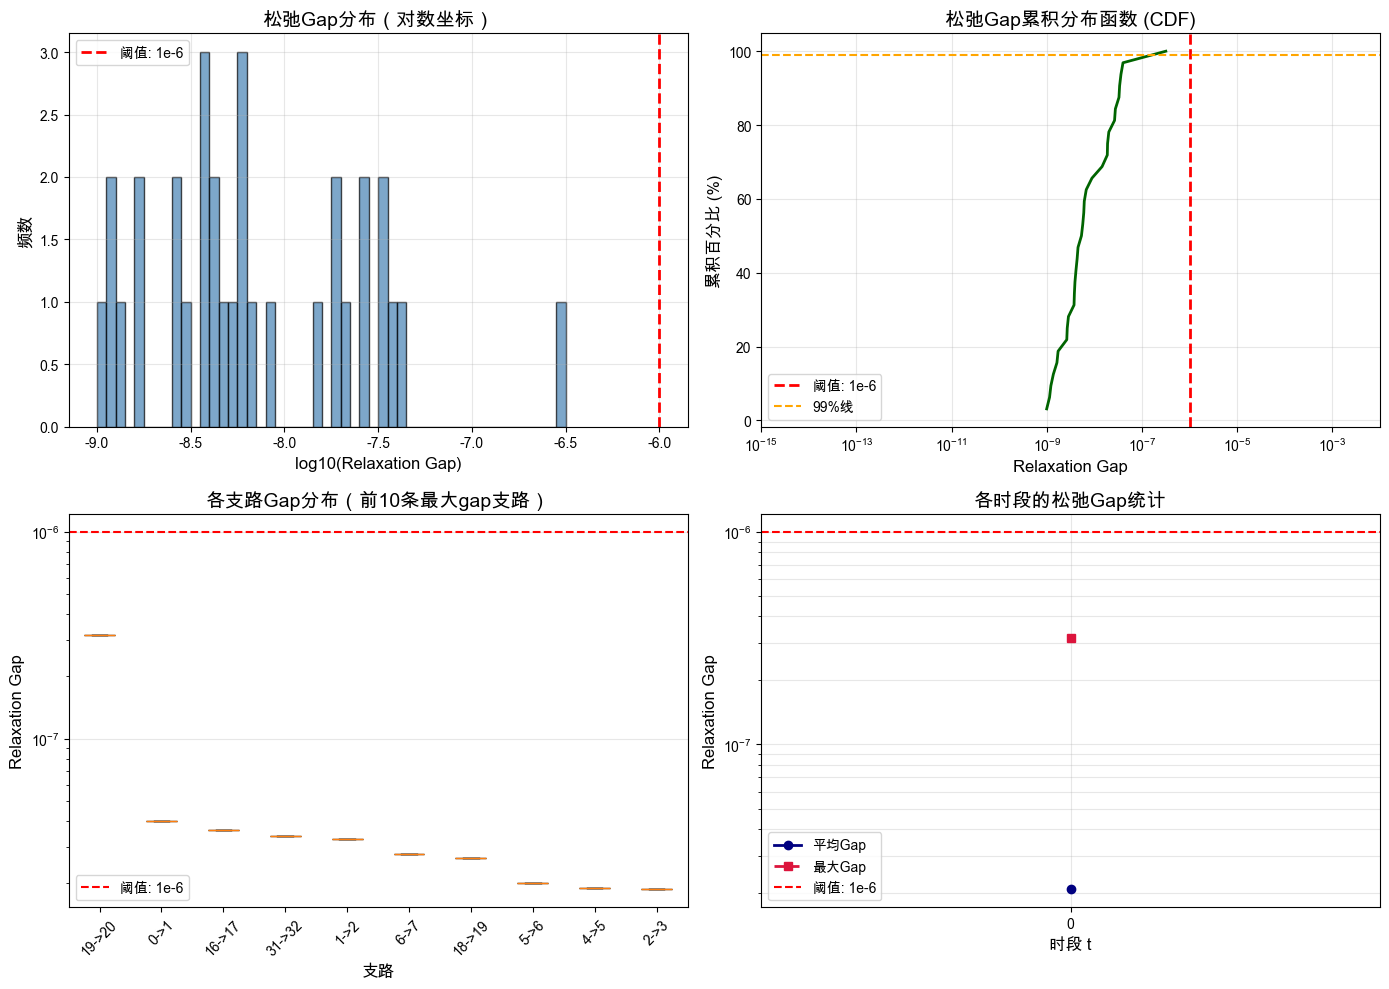

In [4]:
# ======================== SOCP 松弛Gap可视化 ========================
import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置中文字体
mpl.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'STHeiti']  # macOS
mpl.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

if model.status == GRB.OPTIMAL and len(relaxation_gaps) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # ========== 子图1: Gap分布直方图（对数坐标）==========
    ax1 = axes[0, 0]
    # 过滤掉为0的gap值（避免对数坐标问题）
    gaps_nonzero = relaxation_gaps[relaxation_gaps > 0]
    if len(gaps_nonzero) > 0:
        ax1.hist(np.log10(gaps_nonzero), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        ax1.set_xlabel('log10(Relaxation Gap)', fontsize=12)
        ax1.set_ylabel('频数', fontsize=12)
        ax1.set_title('松弛Gap分布（对数坐标）', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        ax1.axvline(x=np.log10(1e-6), color='red', linestyle='--', linewidth=2, label='阈值: 1e-6')
        ax1.legend()
    
    # ========== 子图2: Gap累积分布函数 (CDF) ==========
    ax2 = axes[0, 1]
    sorted_gaps = np.sort(relaxation_gaps)
    cumulative = np.arange(1, len(sorted_gaps) + 1) / len(sorted_gaps) * 100
    ax2.semilogx(sorted_gaps, cumulative, linewidth=2, color='darkgreen')
    ax2.set_xlabel('Relaxation Gap', fontsize=12)
    ax2.set_ylabel('累积百分比 (%)', fontsize=12)
    ax2.set_title('松弛Gap累积分布函数 (CDF)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, which='both')
    ax2.axvline(x=1e-6, color='red', linestyle='--', linewidth=2, label='阈值: 1e-6')
    ax2.axhline(y=99, color='orange', linestyle='--', linewidth=1.5, label='99%线')
    ax2.legend()
    ax2.set_xlim([1e-15, 1e-2])
    
    # ========== 子图3: 各支路的Gap分布（箱线图）==========
    ax3 = axes[1, 0]
    gap_by_branch = {}
    for detail in gap_details:
        branch = detail['branch']
        if branch not in gap_by_branch:
            gap_by_branch[branch] = []
        gap_by_branch[branch].append(detail['gap'])
    
    # 选择gap最大的前10条支路
    branch_max_gaps = {branch: max(gaps) for branch, gaps in gap_by_branch.items()}
    top_branches = sorted(branch_max_gaps.items(), key=lambda x: x[1], reverse=True)[:10]
    top_branch_names = [b[0] for b in top_branches]
    top_branch_data = [gap_by_branch[b] for b in top_branch_names]
    
    bp = ax3.boxplot(top_branch_data, labels=top_branch_names, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
    ax3.set_xlabel('支路', fontsize=12)
    ax3.set_ylabel('Relaxation Gap', fontsize=12)
    ax3.set_title('各支路Gap分布（前10条最大gap支路）', fontsize=14, fontweight='bold')
    ax3.tick_params(axis='x', rotation=45)
    ax3.set_yscale('log')
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.axhline(y=1e-6, color='red', linestyle='--', linewidth=1.5, label='阈值: 1e-6')
    ax3.legend()
    
    # ========== 子图4: 各时段的平均Gap ==========
    ax4 = axes[1, 1]
    gap_by_time = {}
    for detail in gap_details:
        t = detail['t']
        if t not in gap_by_time:
            gap_by_time[t] = []
        gap_by_time[t].append(detail['gap'])
    
    time_indices = sorted(gap_by_time.keys())
    avg_gaps = [np.mean(gap_by_time[t]) for t in time_indices]
    max_gaps = [np.max(gap_by_time[t]) for t in time_indices]
    
    ax4.plot(time_indices, avg_gaps, 'o-', linewidth=2, markersize=6, color='navy', label='平均Gap')
    ax4.plot(time_indices, max_gaps, 's--', linewidth=2, markersize=6, color='crimson', label='最大Gap')
    ax4.set_xlabel('时段 t', fontsize=12)
    ax4.set_ylabel('Relaxation Gap', fontsize=12)
    ax4.set_title('各时段的松弛Gap统计', fontsize=14, fontweight='bold')
    ax4.set_yscale('log')
    ax4.grid(True, alpha=0.3, which='both')
    ax4.axhline(y=1e-6, color='red', linestyle='--', linewidth=1.5, label='阈值: 1e-6')
    ax4.legend()
    ax4.set_xticks(time_indices)
    
    plt.tight_layout()
    plt.savefig('output/relaxation_gap_visualization.png', dpi=300, bbox_inches='tight')
    print("\n✓ 可视化图表已保存到: output/relaxation_gap_visualization.png")
    plt.show()
    
else:
    print("无法生成可视化：优化未成功或无数据")


## 扩展验证：测试不同场景下的SOCP松弛精确性

### 理论说明

在**辐射状配电网**中，SOCP松弛通常是精确的，这一性质由以下因素保证：

1. **网络拓扑**：辐射状网络（树状结构，无环路）
2. **功率流方向**：支路功率流向确定
3. **电压降落特性**：沿支路电压单调递减
4. **优化目标**：最小化线路损耗或类似目标

### 可能导致松弛不精确的情况

以下情况可能导致SOCP松弛失去精确性：

1. **网络含有环路**（mesh网络而非辐射网络）
2. **功率双向流动**（例如含有大量分布式发电）
3. **约束过紧**（某些节点电压、功率约束很紧）
4. **负荷分布不均衡**

### 建议的扩展测试

可以通过修改以下参数来测试更多场景：

```python
# 1. 测试不同的负荷水平
# 在 case33.py 中修改负荷倍数

# 2. 测试不同的电压上下限
Vmax = 1.05  # 更紧的电压上限
Vmin = 0.95  # 更紧的电压下限

# 3. 测试不同的网络拓扑
# 添加或删除某些支路，测试接近环路的情况

# 4. 测试不同的优化目标
# 例如最小化发电成本而非线路损耗
```

### 参考文献

关于SOCP松弛精确性的理论基础：

1. **Farivar & Low (2013)**: "Branch Flow Model: Relaxations and Convexification"
2. **Gan & Low (2014)**: "Exact Convex Relaxation of Optimal Power Flow in Radial Networks"
3. **Bose et al. (2015)**: "A Semidefinite Programming Approach to Optimal Power Flow"